In [3]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV, train_test_split

In [25]:
df_old = pd.read_csv('../data/source/cs1.csv', sep=';')

C:\Users\micha\AppData\Local\Temp\ipykernel_20676\979863083.py:1: DtypeWarning: Columns (2,3,4,9,10,11,12,15,17,18,19,20,21,22,23,25,27,30,31,33,35,37,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df_old = pd.read_csv('../data/source/cs1.csv', sep=';')


In [26]:
df_old

,ID,obs_date,Var_01,Var_02,Var_03,Var_04,Var_05,Var_06,Var_07,Var_08,...,Var_31,Var_32,Var_33,Var_34,Var_35,Var_36,Var_37,Var_38,Var_39,default
0,6311599,2020-12-31,122250.264804,131926.535026,84378.268488,4.452988,-0.573123,5.392172e+03,0.146342,44658.328796,...,2.592428,-84378.268488,-1.196308,104472.999295,0.208097,-84378.268488,-1.685863,NaN,94796.729073,0
1,25934835,2015-12-31,388979.543365,428155.215523,57139.405376,1.517365,0.894176,1.031739e+04,0.056952,65081.557258,...,3.092091,74713.755852,0.622329,39287.462687,0.877436,74713.755852,0.990912,118700.188994,132627.530457,0
2,70390679,2019-12-31,1489136519.61685,1520699893.50543,NaN,1.112577,0.303833,2.193759e+07,0.008544,115525752.82888,...,10.579640,89293453.779858,0.355066,160642836.521787,0.894363,89293453.779858,0.649580,572423955.919009,150679799.394689,0
3,70390679,2020-12-31,1523974223.618,1549976390.42182,2863042.123749,1.162289,0.088073,2.196899e+07,0.014428,187729854.4136,...,9.376734,25441411.738188,0.092185,219490778.185551,0.858391,25441411.738188,0.121324,1172183241.47731,212790590.964952,0
4,70390679,2016-12-31,1795857407.75616,1796012059.89858,NaN,1.323929,0.086474,NaN,0.014659,208699844.286765,...,7.926945,58547434.819628,0.180772,436283359.5479,0.757082,58547434.819628,0.280534,510653641.689678,439397022.682114,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38820,50036390,2020-12-31,98564.0126444701,101396.399532102,10146.420053,6.425659,0.362302,8.737854e+02,0.131924,66573.804547,...,5.042210,23748.1487068625,0.298407,55552.751559,0.452123,23748.1487068625,0.352098,4125.691014,83224.883297,0
38821,15853756,2017-12-31,34767.492725456,49891.6605643702,26761.414133,1.279394,-2.894691,-3.668688e+01,0.215534,66790.13951,...,6.207698,-26761.4141329616,-0.334267,7708.414558,0.845497,-26761.4141329616,-0.400899,2377.14331,7592.517357,0
38822,15853756,2016-12-31,9395.38580875099,13168.942404069,8052.164429,0.646936,0.367477,4.352037e+02,0.076480,20091.009913,...,20.380253,-8052.16442930698,-0.351285,-19621.777911,2.490004,-8052.16442930698,-0.392287,0.0,-5127.523746,0
38823,91988808,2021-06-30,78536.1687510833,3431527.55818301,15700.44388,1.323897,-120.526693,NaN,-0.014040,-1590.527164,...,0.033013,3372336.86212356,-1199.692943,-15831.714709,1.004614,3372336.86212356,-2120.263607,35299.970892,19214.201862,0


In [23]:
def custom_converter(val):
    try:
        return float(val.replace(',', '.'))
    except ValueError:
        return np.nan

var_cols = {f'Var_{i:02}': custom_converter for i in range(1, 40)}
specified_dtypes = {'ID': str, 'default': int, **var_cols}

df1 = pd.read_csv('../data/source/cs1.csv', sep=';', converters=specified_dtypes, parse_dates=['obs_date'])
df2 = pd.read_csv('../data/source/cs2.csv', sep=';', converters=specified_dtypes, parse_dates=['obs_date'])
df3 = pd.read_csv('../data/source/cs3.csv', sep=';', converters=specified_dtypes, parse_dates=['obs_date'])
df4 = pd.read_csv('../data/source/cs4.csv', sep=';', converters=specified_dtypes, parse_dates=['obs_date'])

In [24]:
df1.head(5)

,ID,obs_date,Var_01,Var_02,Var_03,Var_04,Var_05,Var_06,Var_07,Var_08,...,Var_31,Var_32,Var_33,Var_34,Var_35,Var_36,Var_37,Var_38,Var_39,default
0,6311599,2020-12-31,1.222503e+05,1.319265e+05,8.437827e+04,4.452988,-0.573123,5.392172e+03,0.146342,4.465833e+04,...,2.592428,-8.437827e+04,-1.196308,1.044730e+05,0.208097,-8.437827e+04,-1.685863,NaN,9.479673e+04,0
1,25934835,2015-12-31,3.889795e+05,4.281552e+05,5.713941e+04,1.517365,0.894176,1.031739e+04,0.056952,6.508156e+04,...,3.092091,7.471376e+04,0.622329,3.928746e+04,0.877436,7.471376e+04,0.990912,1.187002e+05,1.326275e+05,0
2,70390679,2019-12-31,1.489137e+09,1.520700e+09,NaN,1.112577,0.303833,2.193759e+07,0.008544,1.155258e+08,...,10.579640,8.929345e+07,0.355066,1.606428e+08,0.894363,8.929345e+07,0.649580,5.724240e+08,1.506798e+08,0
3,70390679,2020-12-31,1.523974e+09,1.549976e+09,2.863042e+06,1.162289,0.088073,2.196899e+07,0.014428,1.877299e+08,...,9.376734,2.544141e+07,0.092185,2.194908e+08,0.858391,2.544141e+07,0.121324,1.172183e+09,2.127906e+08,0
4,70390679,2016-12-31,1.795857e+09,1.796012e+09,NaN,1.323929,0.086474,NaN,0.014659,2.086998e+08,...,7.926945,5.854743e+07,0.180772,4.362834e+08,0.757082,5.854743e+07,0.280534,5.106536e+08,4.393970e+08,0


In [27]:
df_final = pd.concat([df1, df2, df3, df4], ignore_index=True)

In [ ]:
df_final

In [16]:
# Calculate avg default rate for each obs_date and show it in a frame
df_final['default'] = df_final['default'].astype('int')
df_final['obs_date'] = pd.to_datetime(df_final['obs_date'])
df_final['year'] = df_final['obs_date'].dt.year
#Calculate mean for each of the years
df_final.groupby('year')['default'].mean()



year
2015    0.155032
2016    0.059252
2017    0.043093
2018    0.036205
2019    0.035736
2020    0.031562
2021    0.031808
Name: default, dtype: float64

In [17]:
summary_df = df_final.groupby('year')['default'].agg(['mean', 'count'])
summary_df.rename(columns={'mean': 'default_rate', 'count': 'num_observations'}, inplace=True)

In [ ]:
df_final

In [18]:
summary_df

,default_rate,num_observations
year,,
2015,0.155032,23092
2016,0.059252,24995
2017,0.043093,26153
2018,0.036205,23864
2019,0.035736,21659
2020,0.031562,19137
2021,0.031808,10029


In [20]:
df_final

,ID,obs_date,Var_01,Var_02,Var_03,Var_04,Var_05,Var_06,Var_07,Var_08,...,Var_32,Var_33,Var_34,Var_35,Var_36,Var_37,Var_38,Var_39,default,year
0,6311599,2020-12-31,122250.264804,131926.535026,84378.268488,4.452988,-0.573123,5392.171833,0.146342,44658.328796,...,-84378.268488,-1.196308,104472.999295,0.208097,-84378.268488,-1.685863,NaN,94796.729073,0,2020
1,25934835,2015-12-31,388979.543365,428155.215523,57139.405376,1.517365,0.894176,10317.386614,0.056952,65081.557258,...,74713.755852,0.622329,39287.462687,0.877436,74713.755852,0.990912,118700.188994,132627.530457,0,2015
2,70390679,2019-12-31,1489136519.61685,1520699893.50543,NaN,1.112577,0.303833,21937594.341302,0.008544,115525752.82888,...,89293453.779858,0.355066,160642836.521787,0.894363,89293453.779858,0.649580,572423955.919009,150679799.394689,0,2019
3,70390679,2020-12-31,1523974223.618,1549976390.42182,2863042.123749,1.162289,0.088073,21968985.383216,0.014428,187729854.4136,...,25441411.738188,0.092185,219490778.185551,0.858391,25441411.738188,0.121324,1172183241.47731,212790590.964952,0,2020
4,70390679,2016-12-31,1795857407.75616,1796012059.89858,NaN,1.323929,0.086474,NaN,0.014659,208699844.286765,...,58547434.819628,0.180772,436283359.5479,0.757082,58547434.819628,0.280534,510653641.689678,439397022.682114,0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148924,18704864,2020-12-31,1569995866.54535,1570014044.90176,184283036.978608,1.457124,-0.128417,130672.508855,0.009390,133604374.271957,...,-101546828.42537,-0.472967,492552065.20818,0.686275,-101546828.42537,-0.759314,937160227.14684,492533886.851775,0,2020
148925,18704864,2019-12-31,2031002975.41981,2031128793.53426,92944281.667,1.173625,0.152625,200355.464716,0.007202,125271520.952874,...,84594090.7444939,0.365641,300590960.266897,0.852008,84594090.7444939,0.674208,1493420585.90457,300465142.152448,1,2019
148926,13920314,2017-12-31,497541.239368,567799.539694,153373.48097,1.490486,-0.340115,7535.736251,0.042170,100257.514771,...,-153373.480969575,-0.738292,233988.164952,0.587904,-153373.480969575,-1.422849,152132.31309,163729.864626,0,2017
148927,13920314,2016-12-31,767428.682888,787920.956428,272794.552964,1.270313,-1.587593,4596.592465,0.072011,215352.4947,...,-272794.552963923,-0.679821,94184.102879,0.880465,-272794.552963923,-1.240262,311533.423998,163302.90921,0,2016


In [34]:
import pandas as pd

# Assuming your DataFrame is named df_final

# Sort the DataFrame by 'ID' and 'obs_date' to ensure observations are ordered correctly
df_final.sort_values(by=['ID', 'obs_date'], inplace=True)

# Find the first occurrence of default = 1 for each ID
first_default_indices = df_final[df_final['default'] == 1].groupby('ID').head(1)

# Merge the first default indices with the original DataFrame to get the corresponding cutoff dates
df_final = df_final.merge(first_default_indices[['ID', 'obs_date']], on='ID', suffixes=('', '_cutoff'), how='left')

# Rename the 'obs_date_cutoff' column to 'cutoff_date'
df_final.rename(columns={'obs_date_cutoff': 'cutoff_date'}, inplace=True)

# Forward fill the cutoff dates to fill the missing values
df_final['cutoff_date'] = df_final.groupby('ID')['cutoff_date'].ffill()

# Filter out rows where 'obs_date' is greater than 'cutoff_date' for each ID
filtered_df = df_final[df_final['obs_date'] <= df_final['cutoff_date']]

# Drop the 'cutoff_date' column if it's no longer needed
filtered_df.drop(columns=['cutoff_date'], inplace=True)

# Display the filtered DataFrame
print(filtered_df)


              ID   obs_date        Var_01        Var_02        Var_03  \
0       10003053 2015-12-31  6.893216e+08  1.021548e+09  2.042659e+08   
1       10003053 2016-12-31  6.739279e+08  1.020290e+09  1.777391e+08   
2       10003053 2017-12-31  4.838933e+08  7.350376e+08  2.206535e+07   
3       10003053 2018-12-31  5.136601e+08  7.702176e+08  1.706802e+07   
4       10003053 2019-12-31  4.025358e+08  6.429393e+08  2.512984e+05   
...          ...        ...           ...           ...           ...   
148821  99937777 2017-12-31  9.233167e+07  2.167795e+08  1.186443e+07   
148822  99937777 2018-12-31  6.561718e+07  1.651962e+08  5.913060e+06   
148857  99964515 2015-12-31  1.282221e+08  9.514216e+08  1.025890e+08   
148880  99968226 2017-12-31  2.623181e+08  2.627941e+08  6.099744e+07   
148912  99991282 2015-12-31  1.320242e+10  3.061059e+10  3.941022e+09   

          Var_04    Var_05        Var_06    Var_07        Var_08  ...  \
0       1.285858 -0.209447  4.886199e+07  0.154099

C:\Users\micha\AppData\Local\Temp\ipykernel_20676\1642863428.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop(columns=['cutoff_date'], inplace=True)


c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


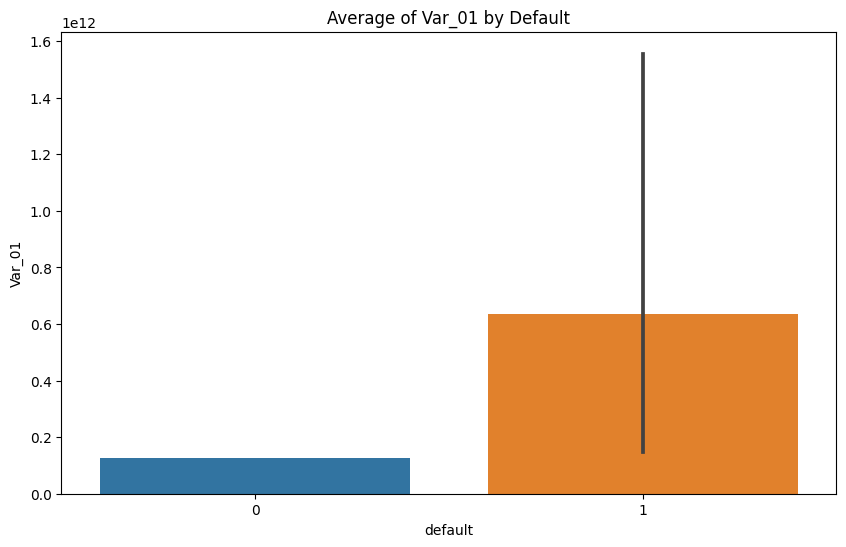

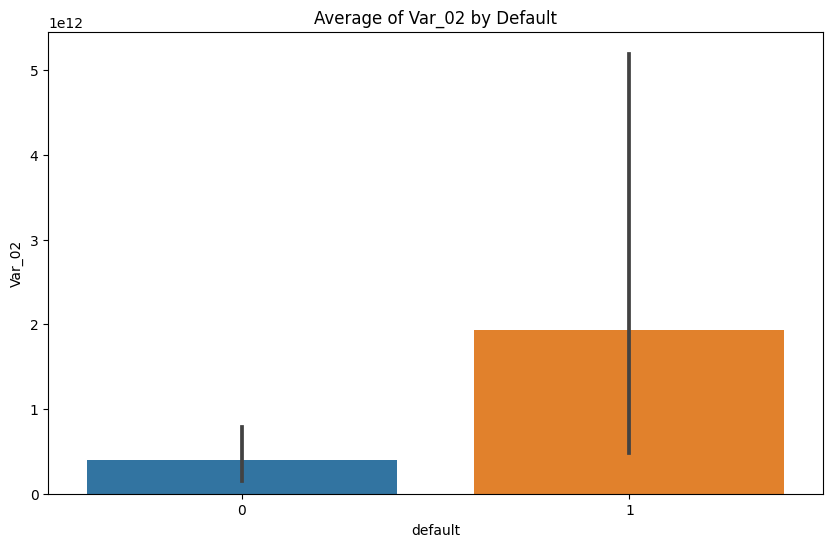

c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


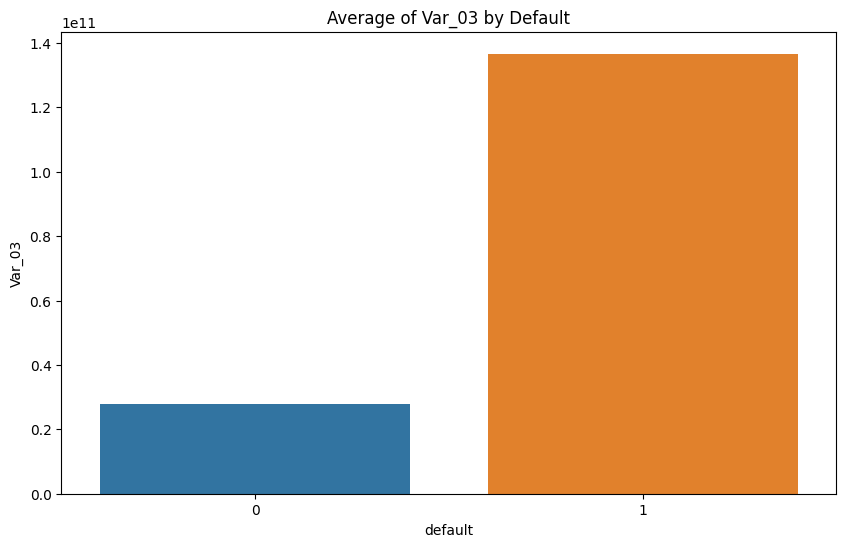

c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


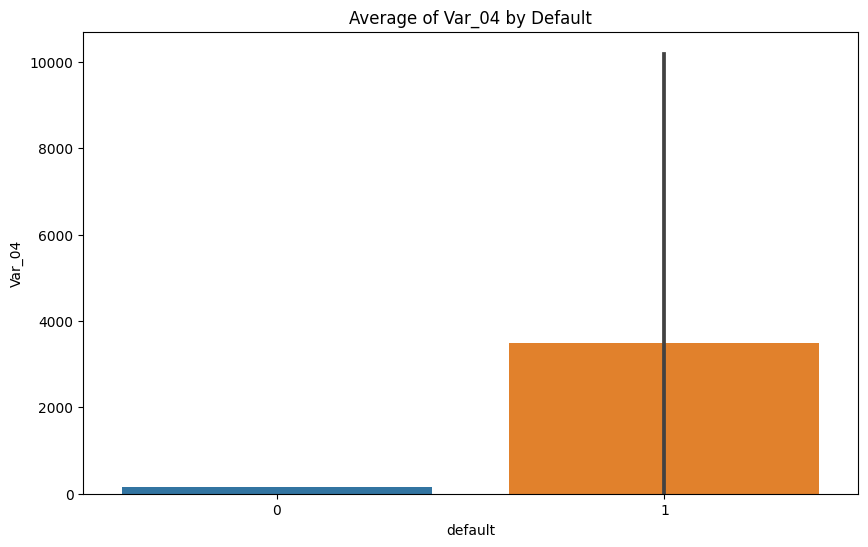

c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


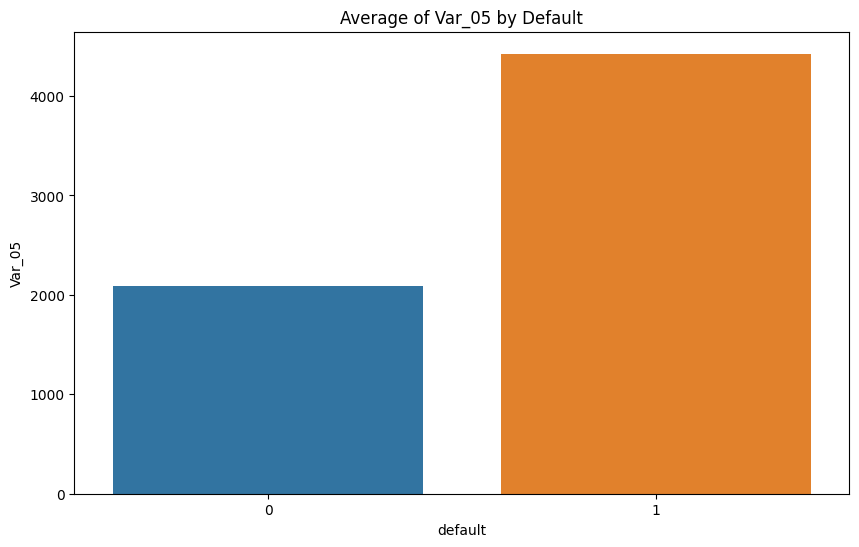

c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


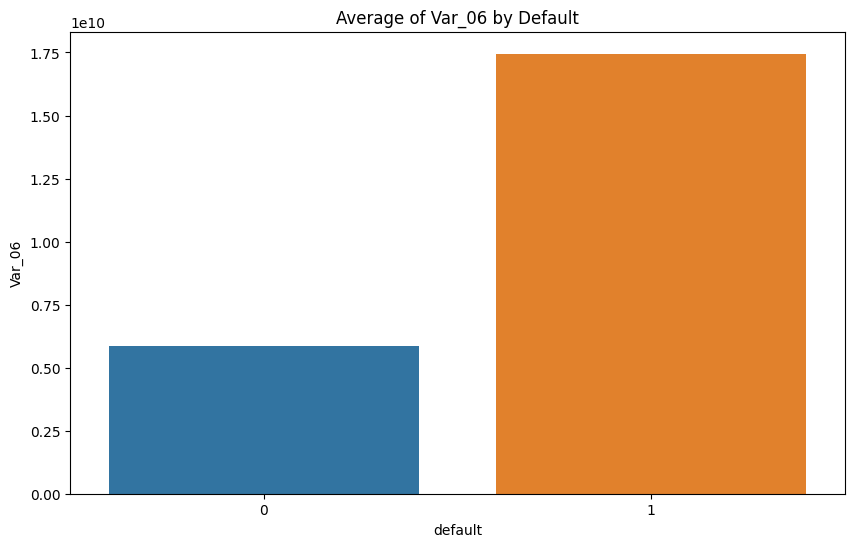

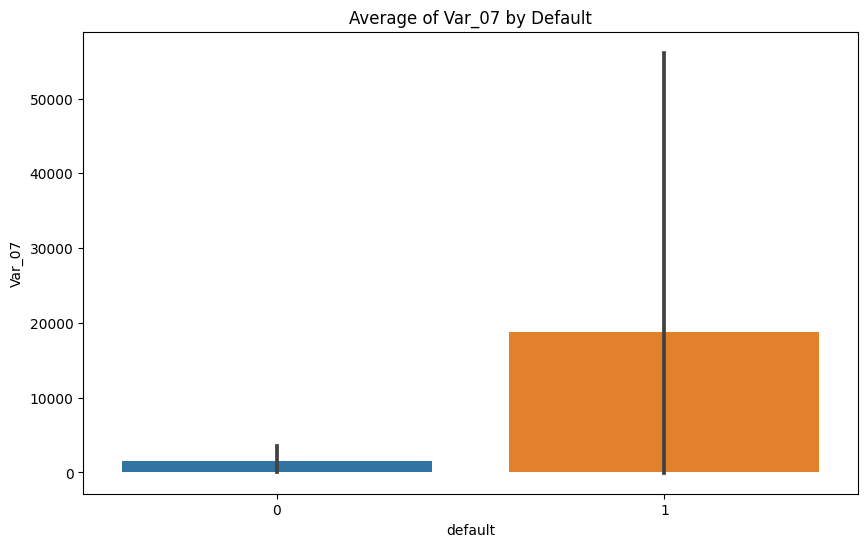

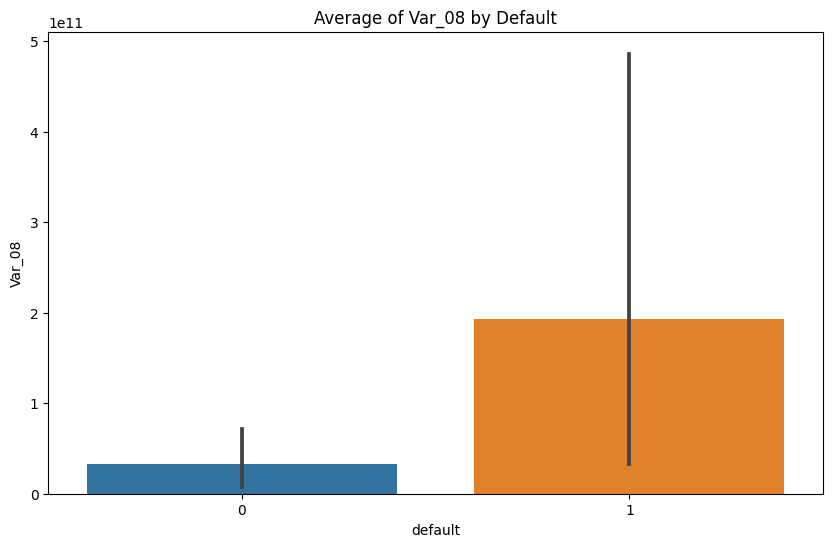

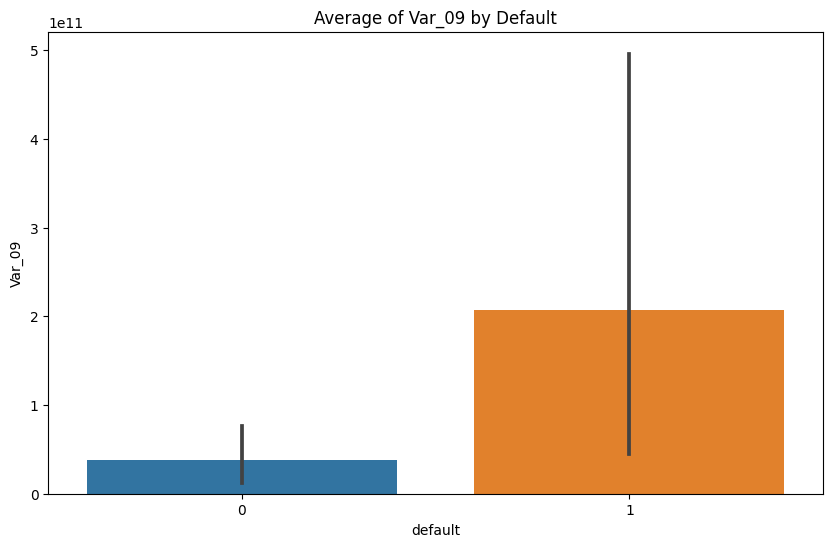

c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


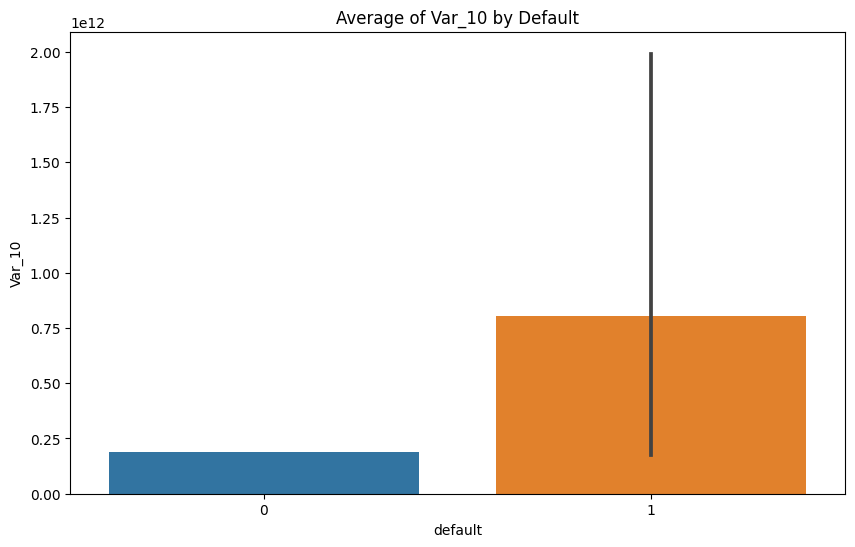

c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


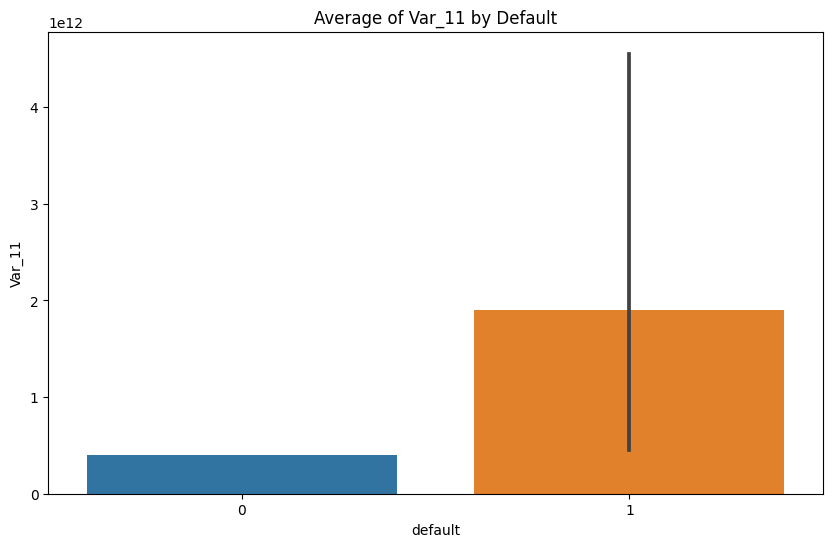

c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


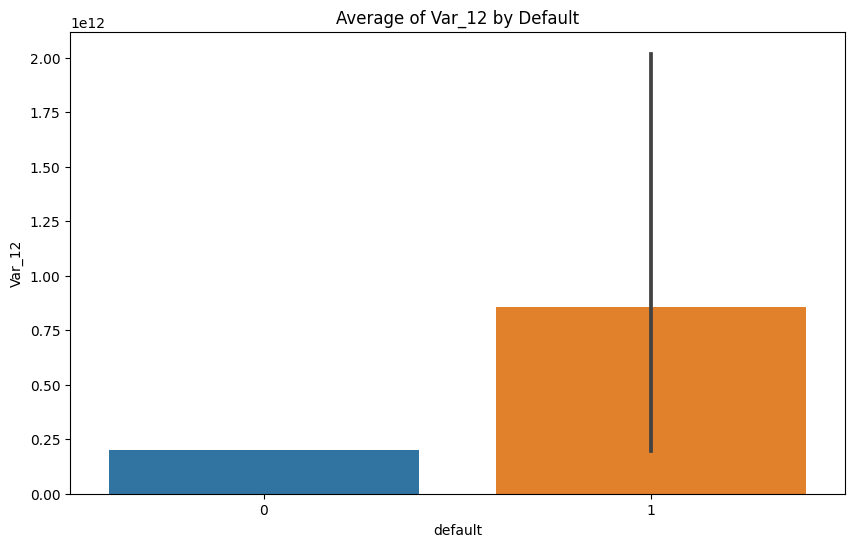

c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


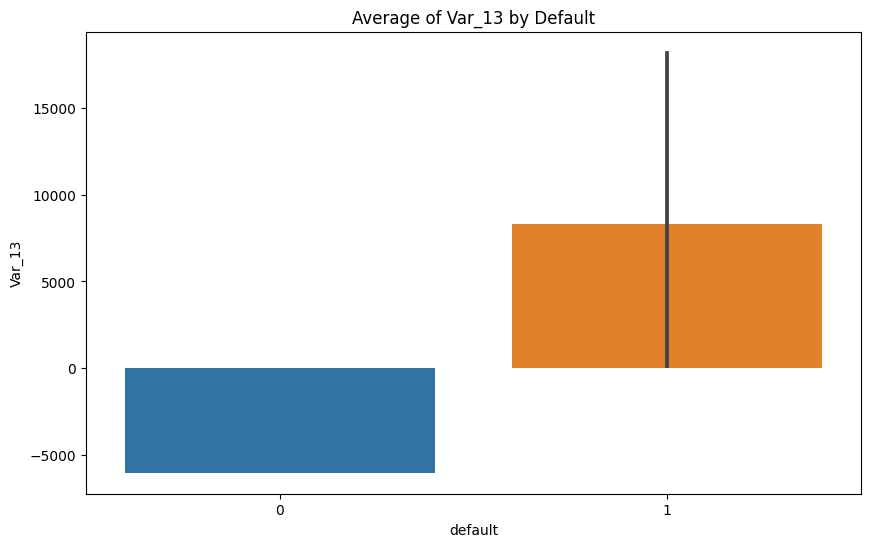

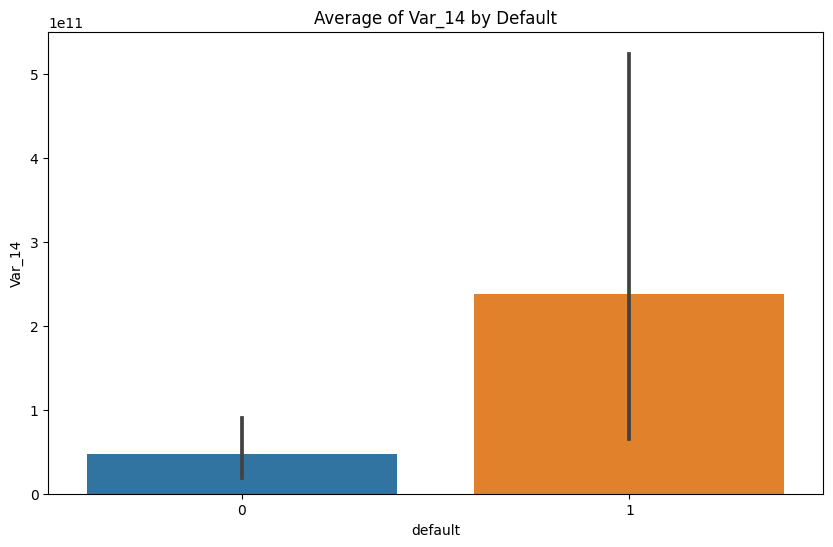

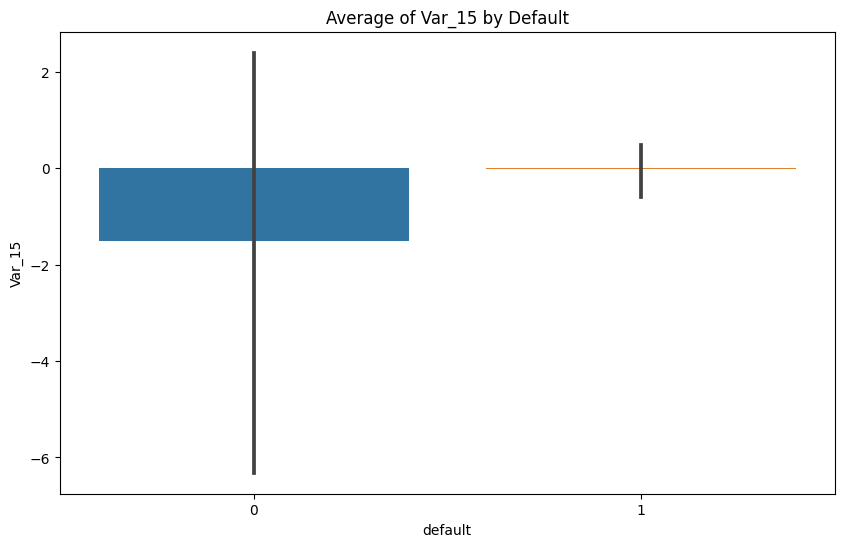

c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


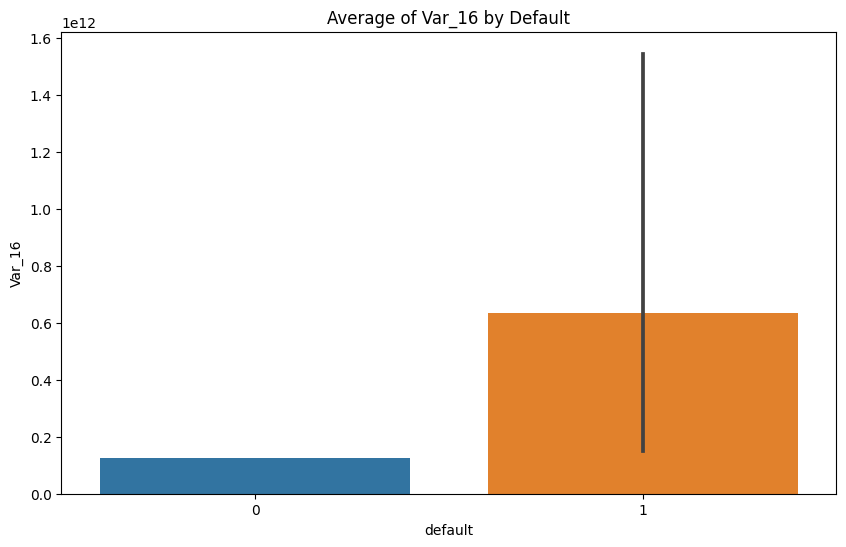

c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


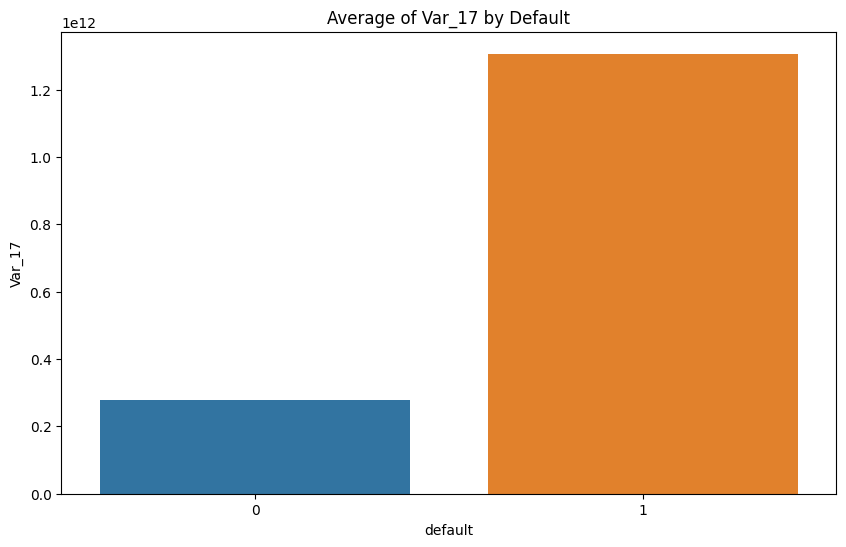

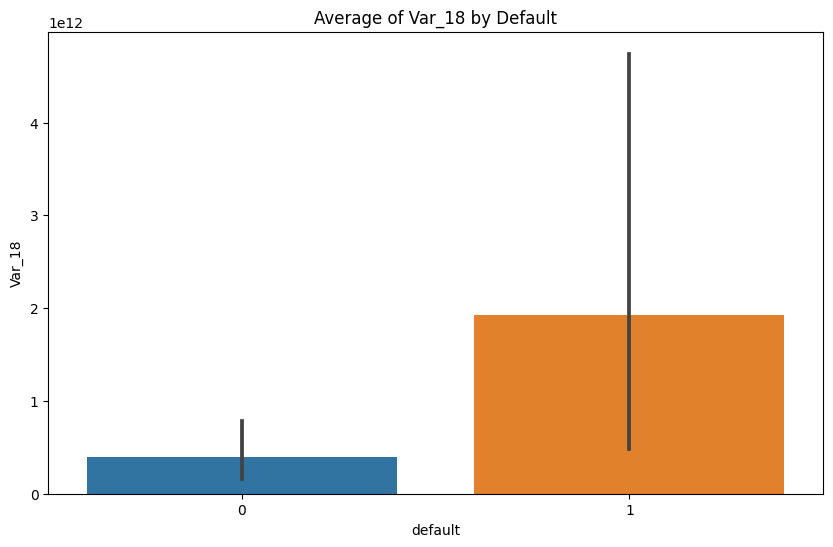

c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


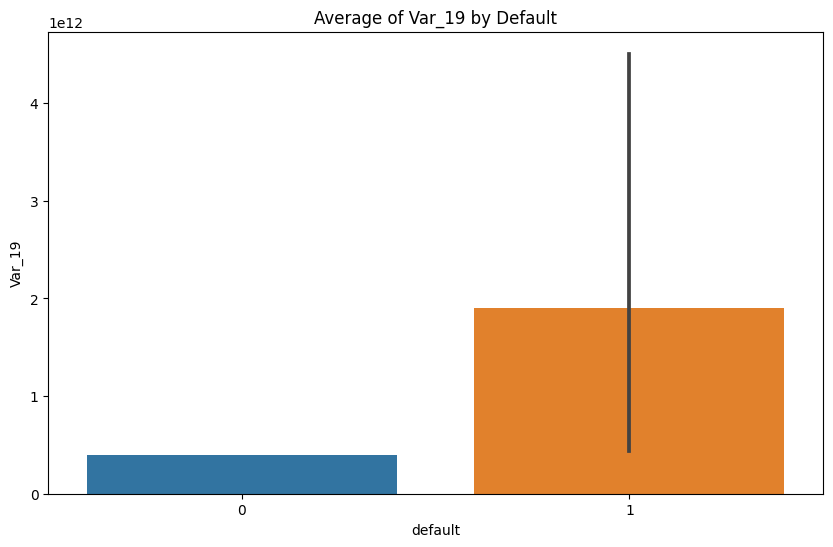

c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


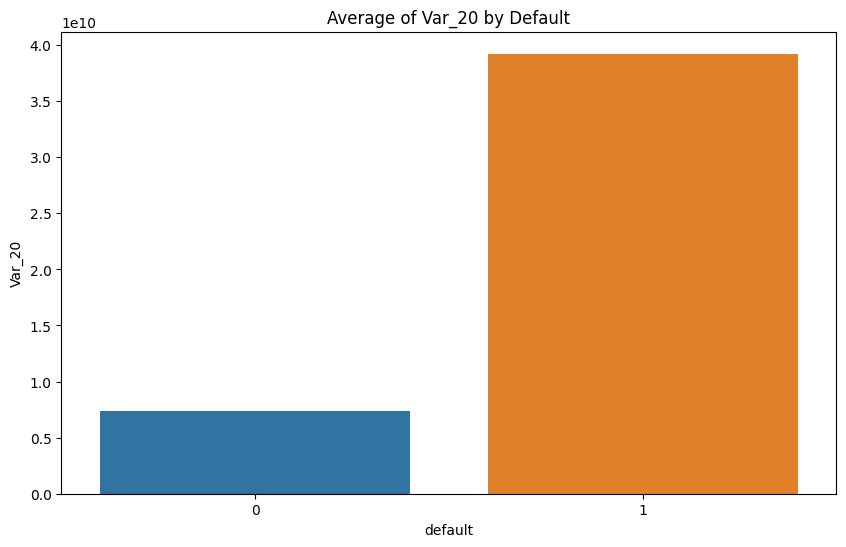

c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


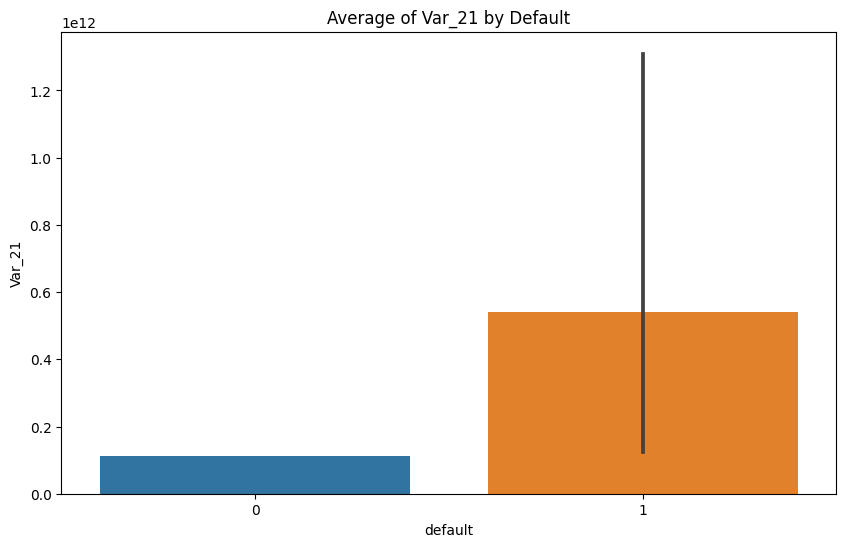

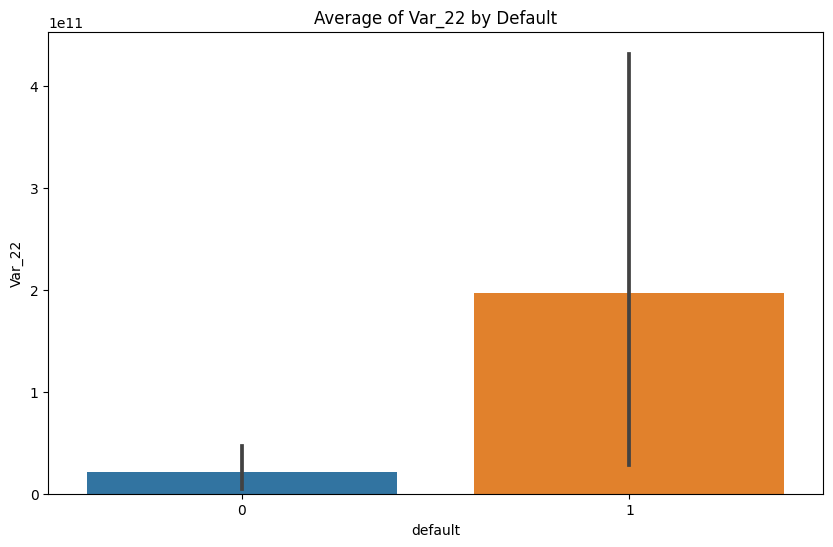

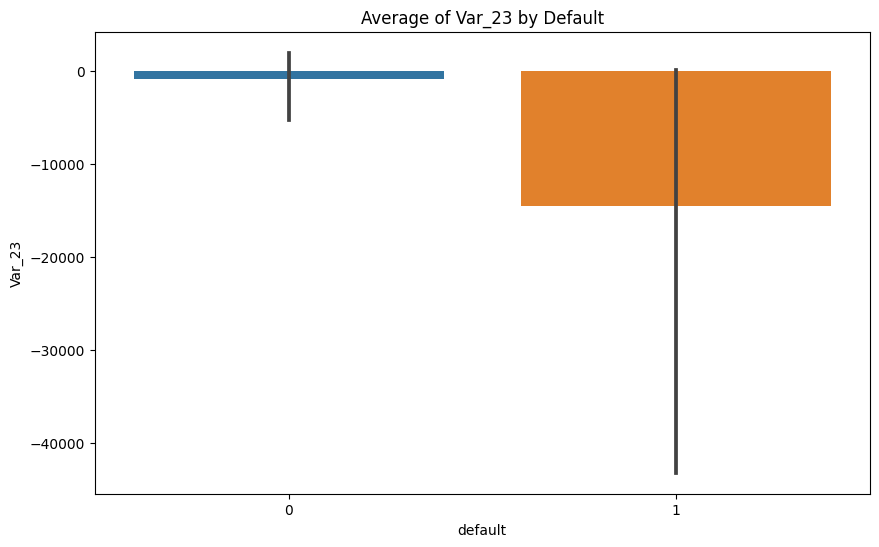

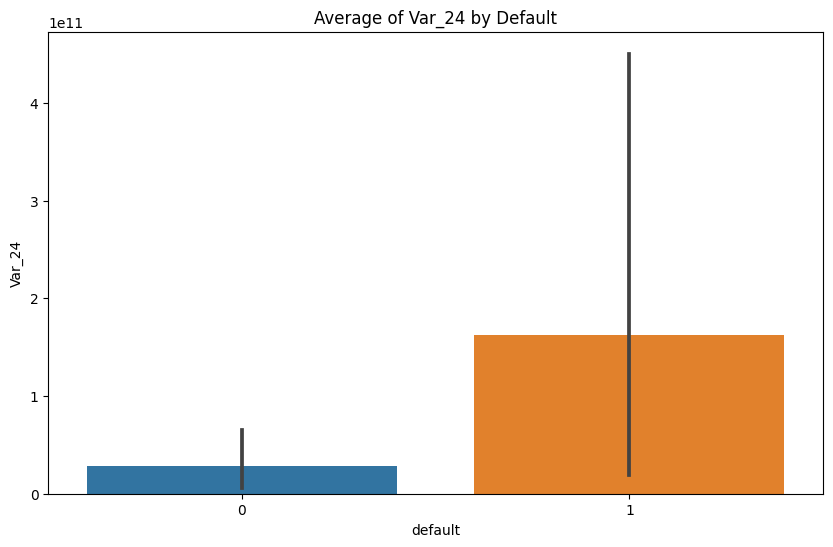

c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


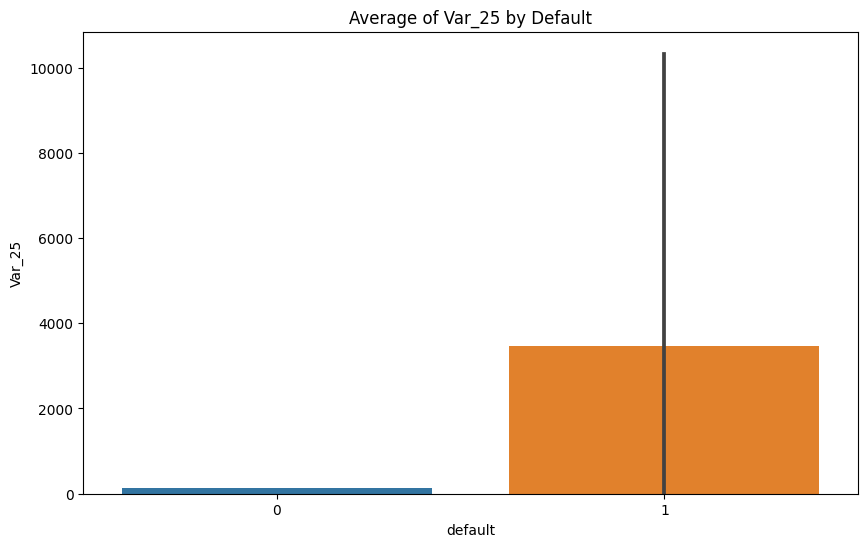

c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


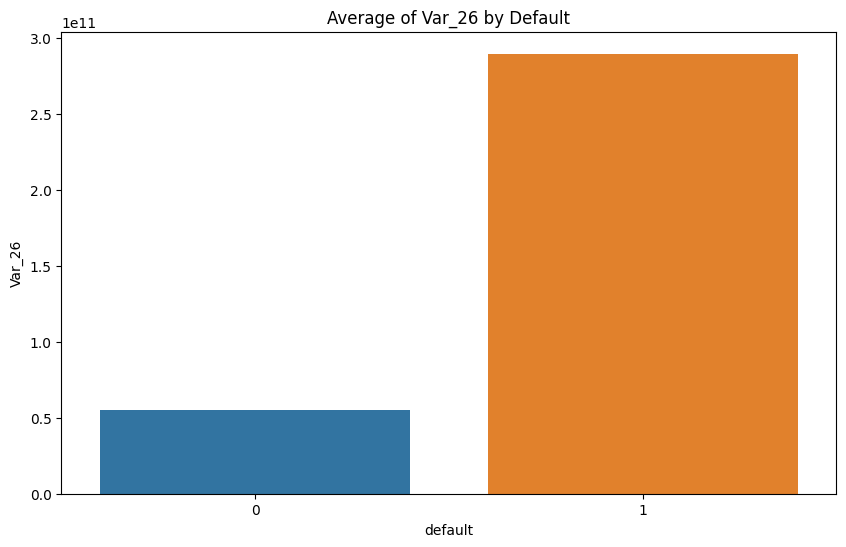

c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


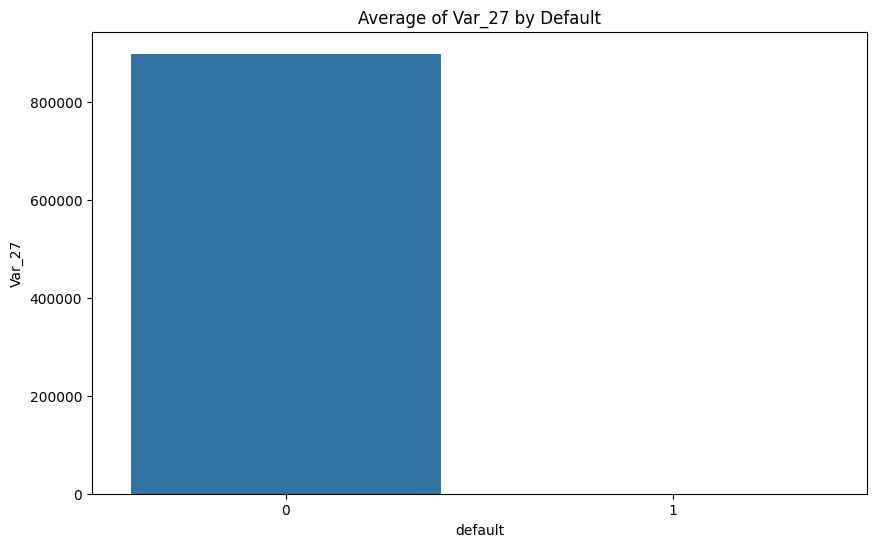

c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


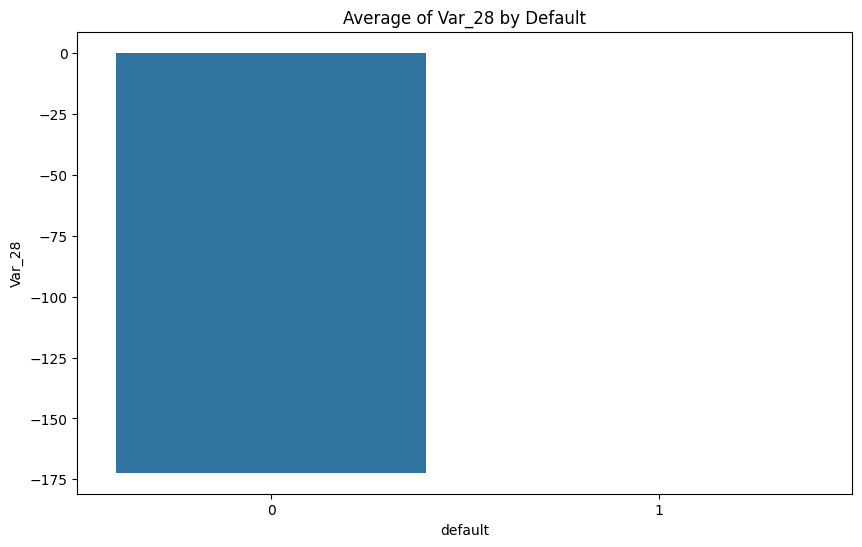

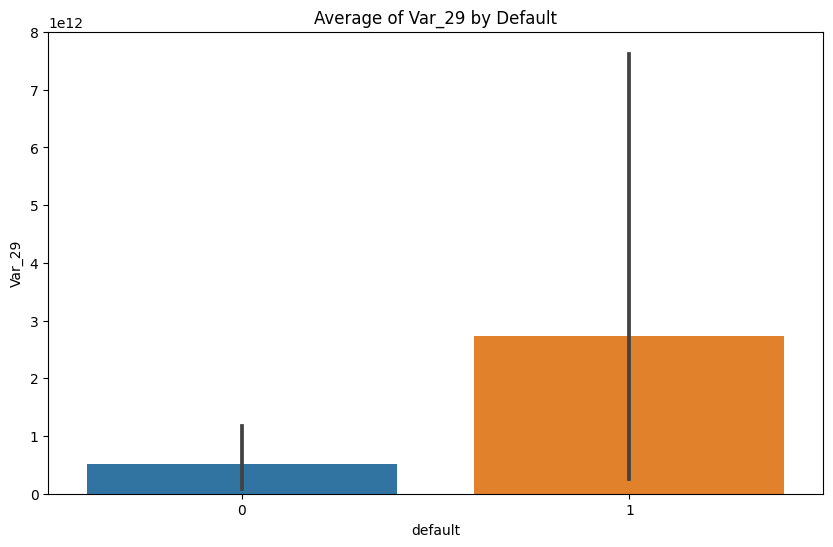

c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


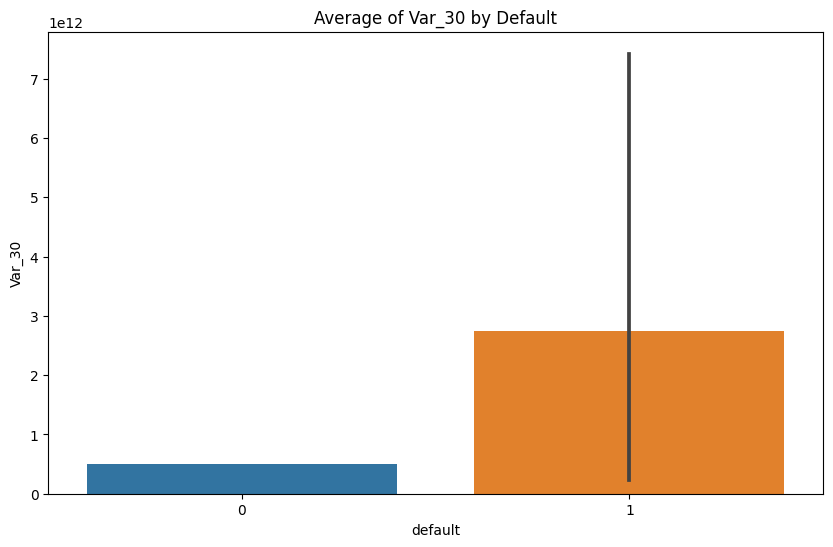

c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


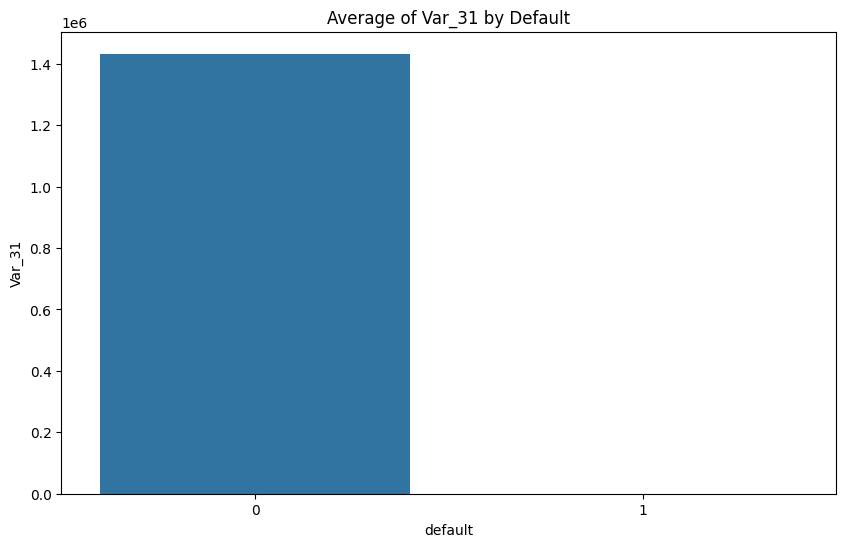

c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


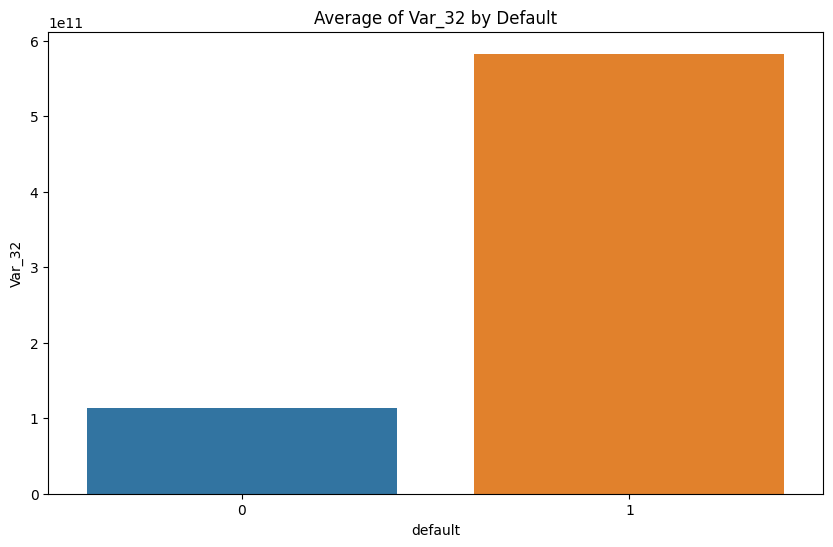

c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


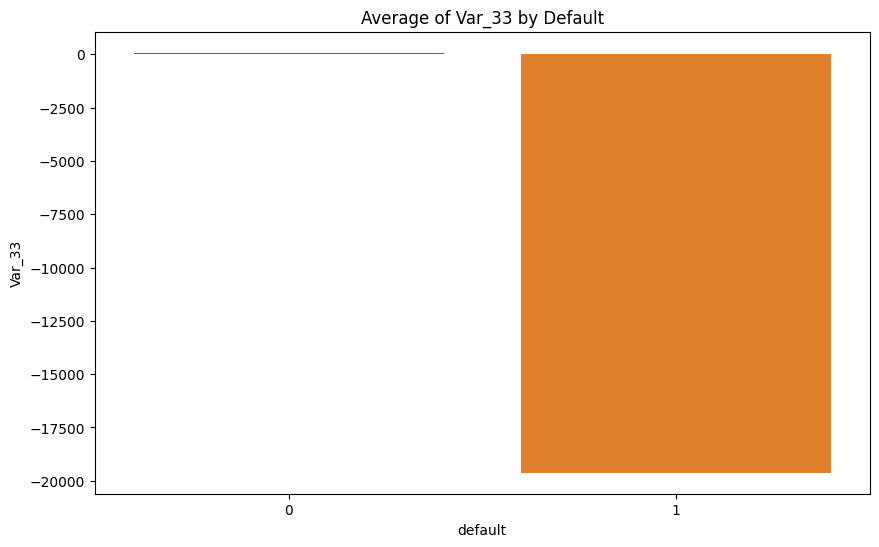

c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


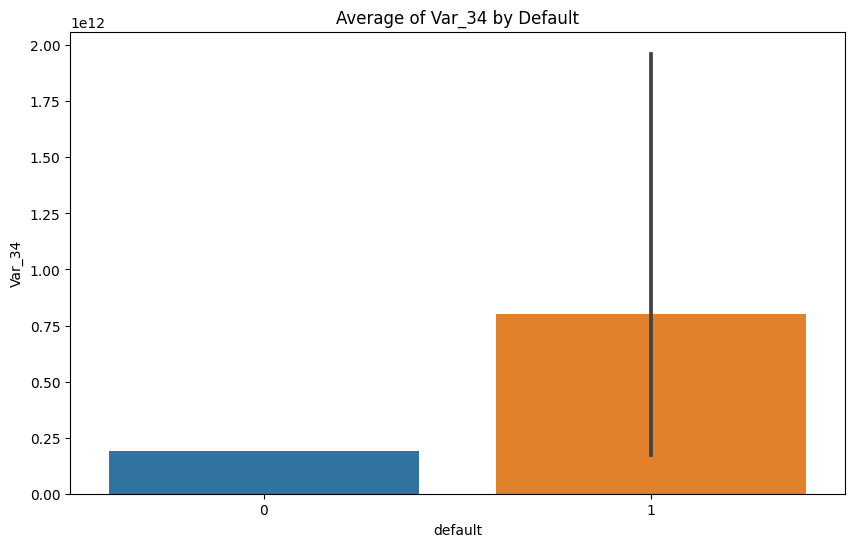

c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


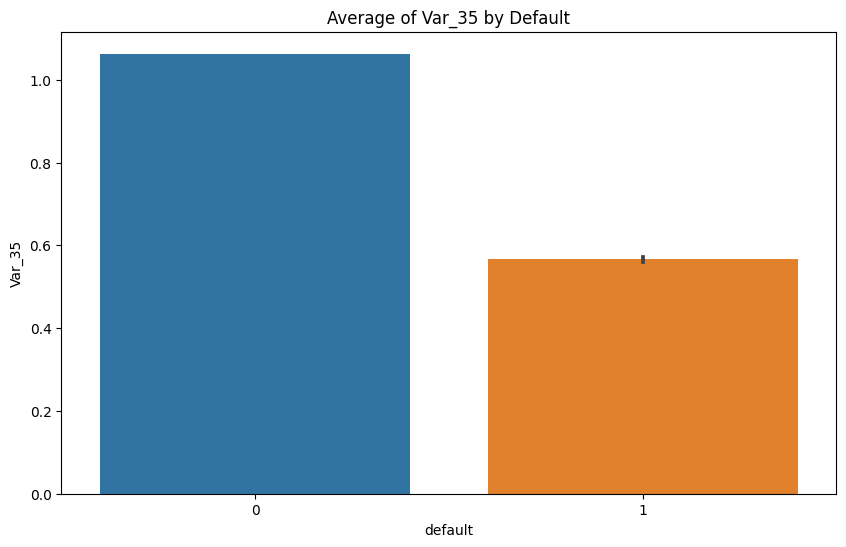

c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


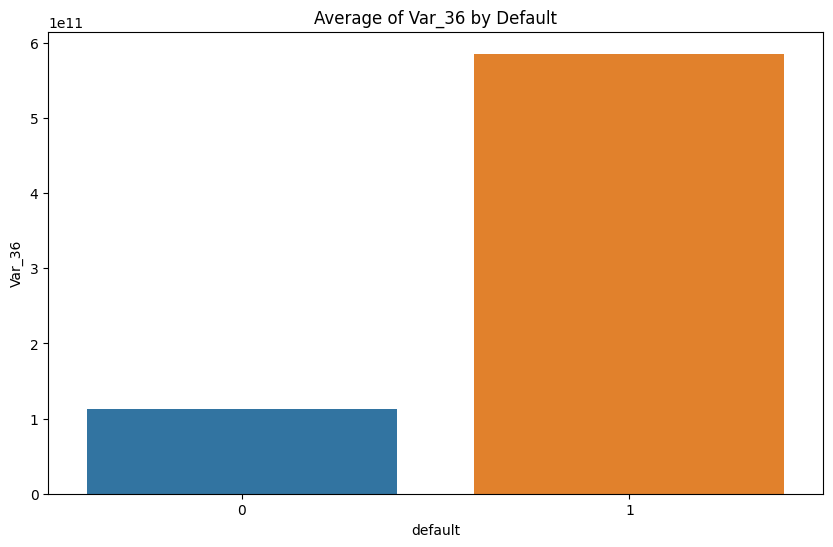

c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


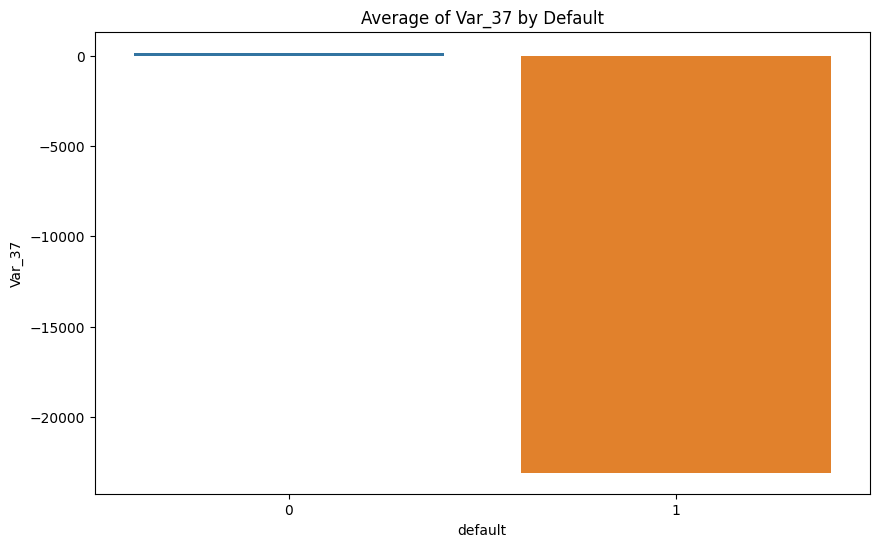

c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


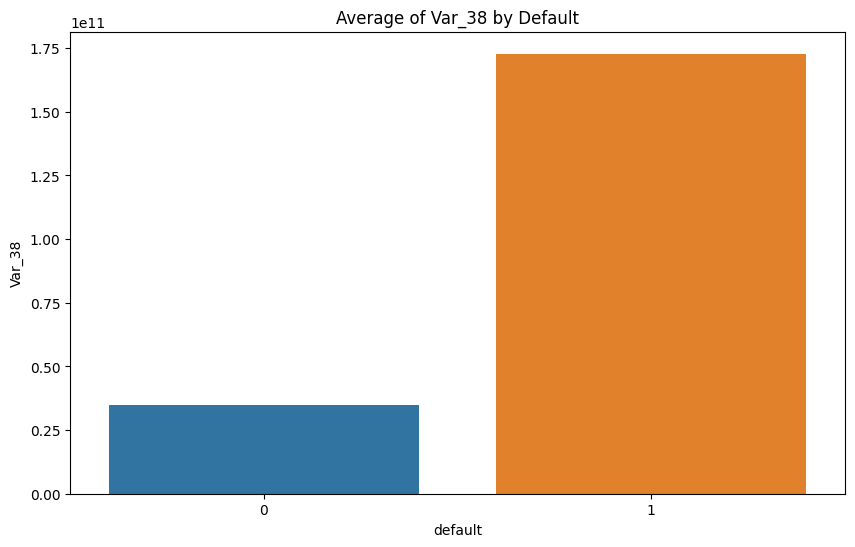

c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


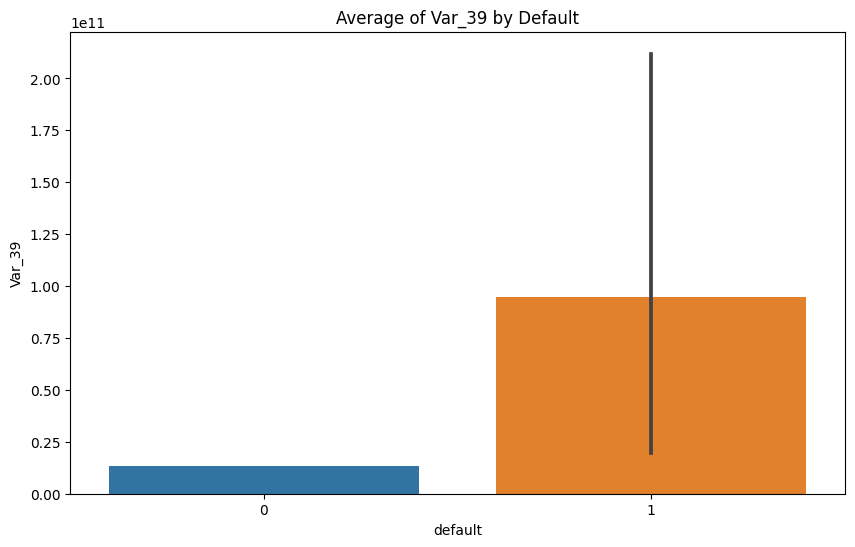

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

var_cols = [col for col in df_final.columns if col.startswith('Var')]

n = len(var_cols)
rows = n // 3 if n % 3 == 0 else n // 3 + 1

fig, axs = plt.subplots(rows, 3, figsize=(15, rows * 5))

for i, col in enumerate(var_cols):
    row = i // 3
    col = i % 3
    sns.barplot(x='default', y=col, data=df_final, estimator=np.mean, ax=axs[row, col])
    axs[row, col].set_title(f'Average of {col} by Default')

plt.tight_layout()
plt.show()